# California Housing

This is a dataset obtained from the StatLib repository. Here is the included description:

## S&P Letters Data
We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables.

The file contains all the the variables. Specifically, it contains median house value, med ian income, housing median age, total rooms, total bedrooms, population, households, latitude, and lo ngitude in that order.
Reference
Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

The manuscript describing the data can be found at www.spatial-statistics.com. The data are also available as Matlab files.

Contact kelley@spatial-statistics.com or kelley@pace.am if you have any further questions. Thanks.

Source: StatLib repository.
Characteristics: 20460 cases, 8 attributes (0 nominal, 8 continuous).
Download : cal_housing.tgz (441963 bytes)

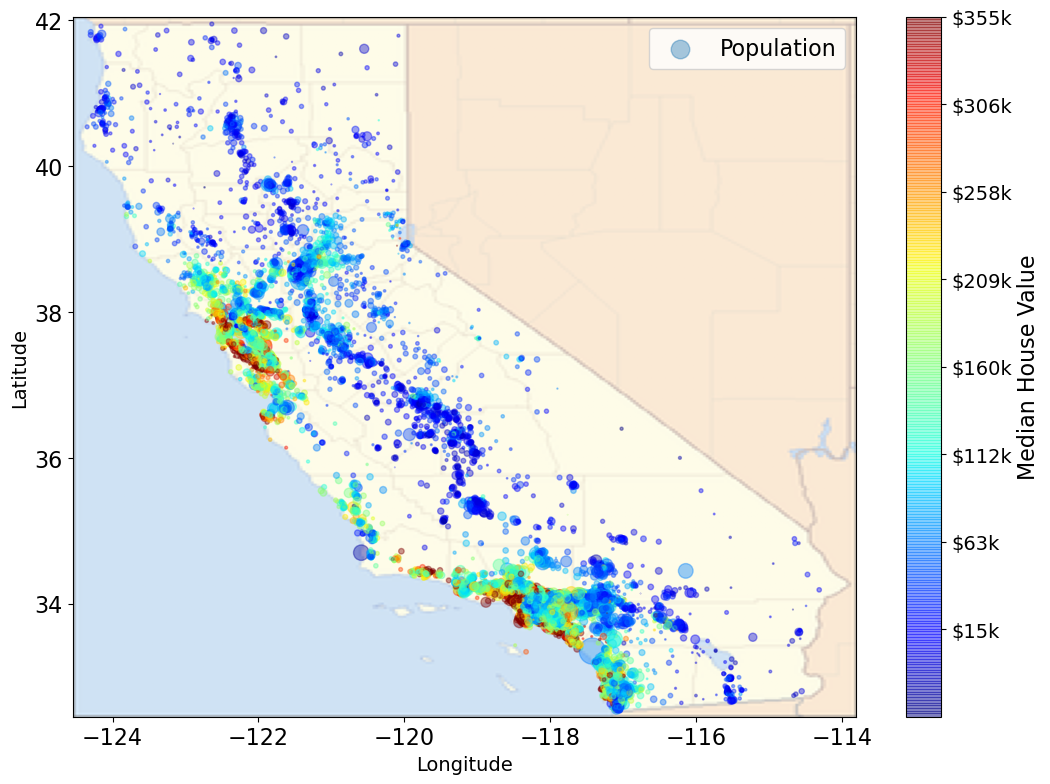

In [110]:
# Common imports
import numpy as np
import pandas as pd
import os

# To plot nice figures for illustrations 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)


In [111]:
dfhouse = pd.read_csv('housing.csv')
dfhouse.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [112]:
dfhouse.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Each row represents one district. There are 10 attributes : see column line for better list above In [3] and In [4]


In [113]:
dfhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All the attributes are numerical apart from 'ocean_proximity' field, therefore it could have any kind of Python object type. One can also inspect what this object is with the following line of python code  --- dfhouse['ocean_proximity'].unique() --- this will list the items. Next step can also be to use value_counts() method to list the frequence of the unique items in the Python object.

In [114]:
dfhouse['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [115]:
dfhouse['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [116]:
dfhouse.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [117]:
dfhouse.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

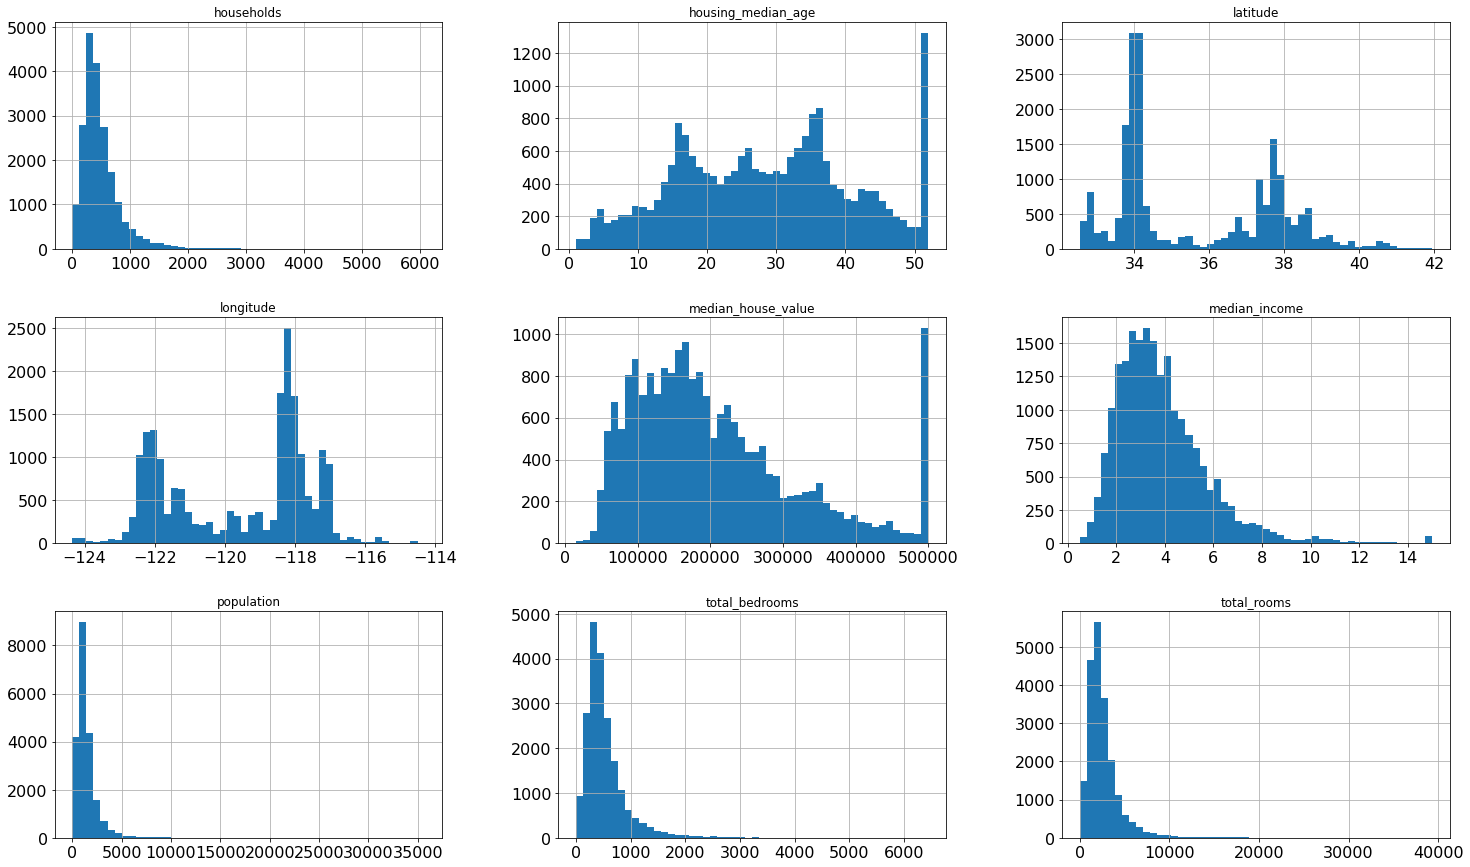

In [118]:
dfhouse.hist(bins=50, figsize=(25,15))
plt.show()

Notable Observation (other observations were made but not important for ML modell)

Median income attribute not expressed in US Dollars (US currency)

1. From information from the team who colleced the data(not me personnaly checking but from online forums) it is said that the data is scalled and additionally capped at 15, and for higher median incomes and 0.5 for lower median incomes. This was also not so obvious when looking at the numbers for example 5 = 50 000 USD. Scalling is obviously not uncommon in ML projects one should just always be aware to understand how it was done so it make the interpretation of the end results clear. This was also not so easy to interpret from the data presented. Something to be aware about. 

2. It is also quite obvious that the attributes have very different scales, this is something to note as well.  

3. A large portion of the histograms tailled to the right of the median, This is due to some houses being sold at super high prices that could make it difficult for the ML prediction. A transoformation of the data is needed. 


In [119]:
dfhouse.corr().transform

<bound method DataFrame.transform of                     longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785  

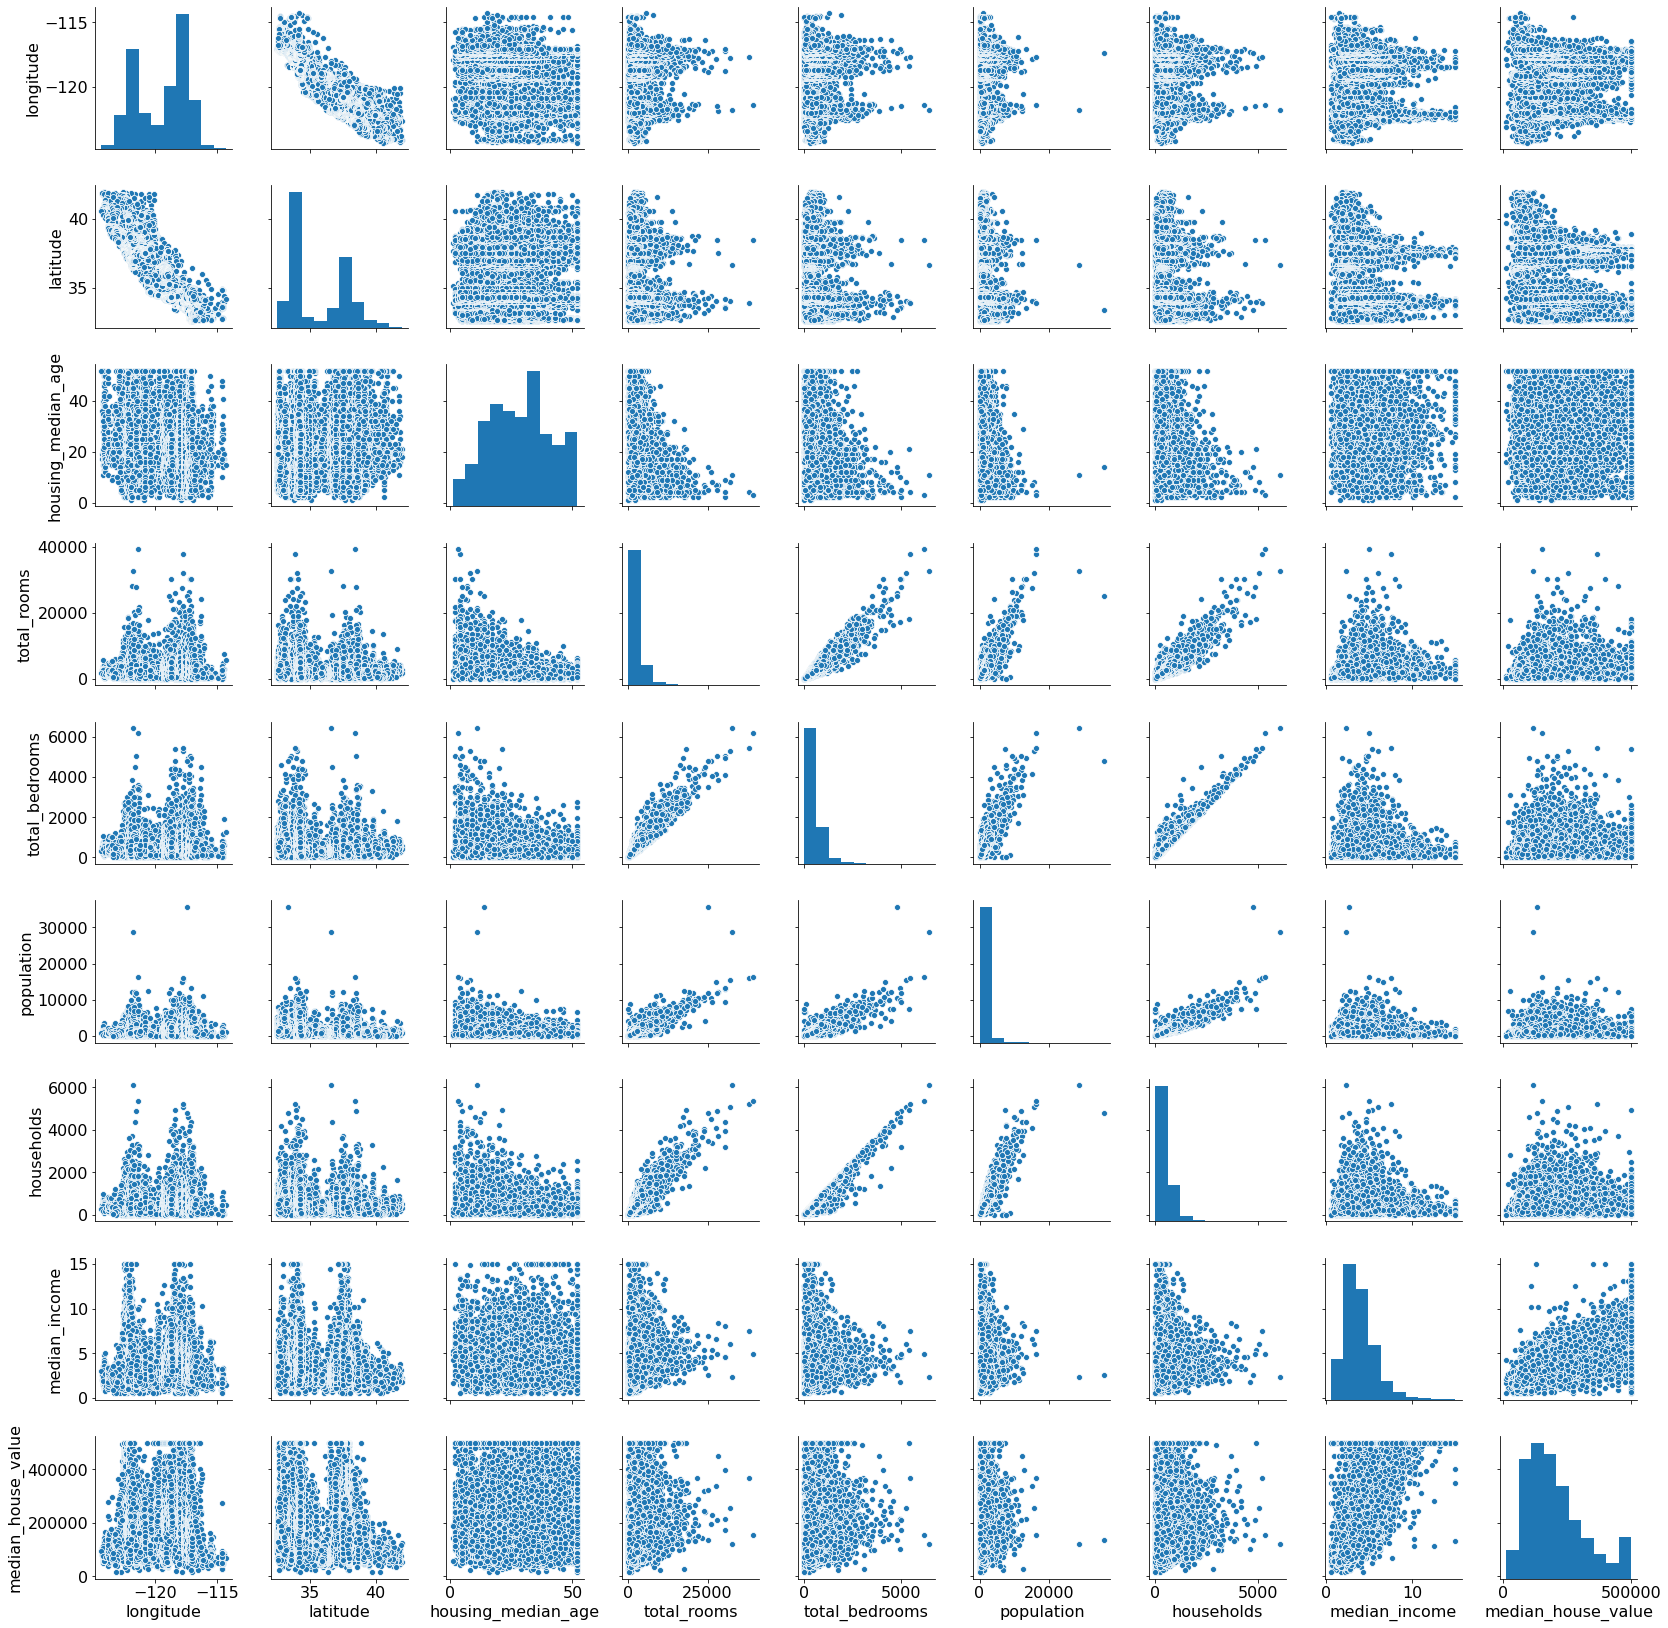

In [120]:
sns.pairplot(dfhouse)

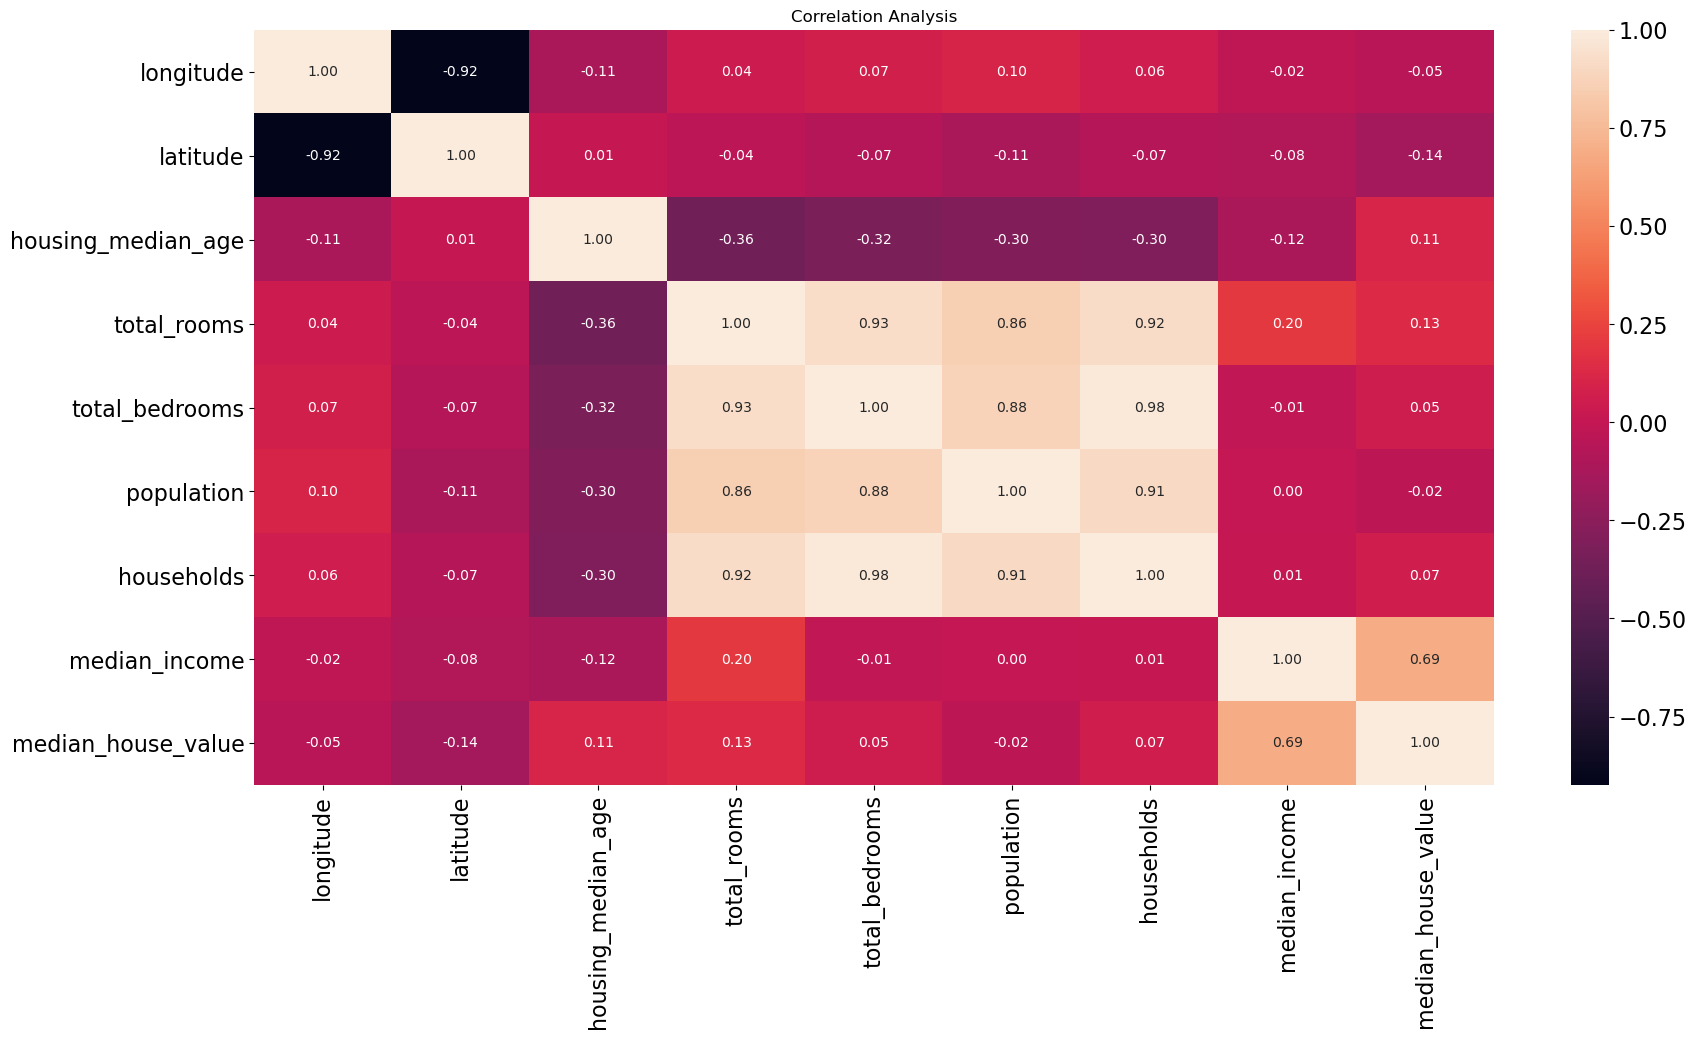

In [121]:
corr1 = dfhouse.corr()
plt.figure(dpi=100, figsize = (20,10))
plt.title('Correlation Analysis')
sns.heatmap(corr1,annot=True,lw=0,linecolor='red',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

Text(0.5, 1.0, 'Distribution of median_income')

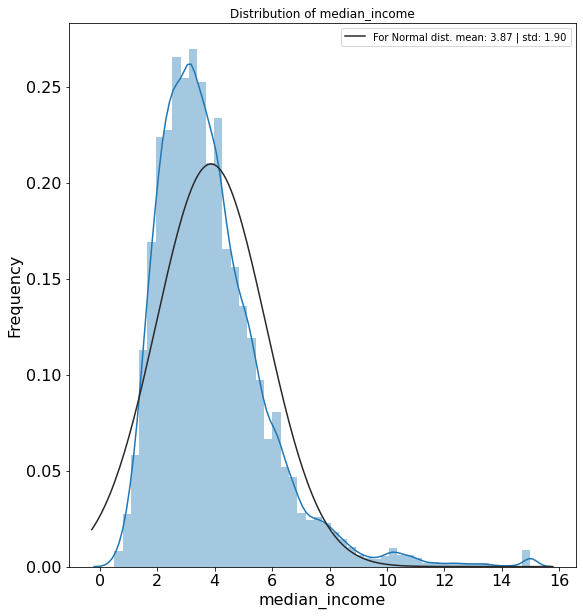

In [122]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(dfhouse['median_income'], fit=norm)
(mu,sigma)= norm.fit(dfhouse['median_income'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of median_income')

The 'median_income' is strongly correlated (positively) to the target, having ‘0.69’ = 69%. Exploring the 'median_income' attribute might give more insight, it is also quite obvious from the heatmap that ‘median_income’ feature is important.  

Inspecting the distribution of the ‘median_income’ features see following histogram cells. 
The ‘median_income’ you will observe that that most of median income values are clustered around 1.5 t0 7 (i.e 15,000- 70,000 USD), but some ‘median_income’ values go far beyond 7.

Text(0.5, 1.0, 'Distribution of median_income')

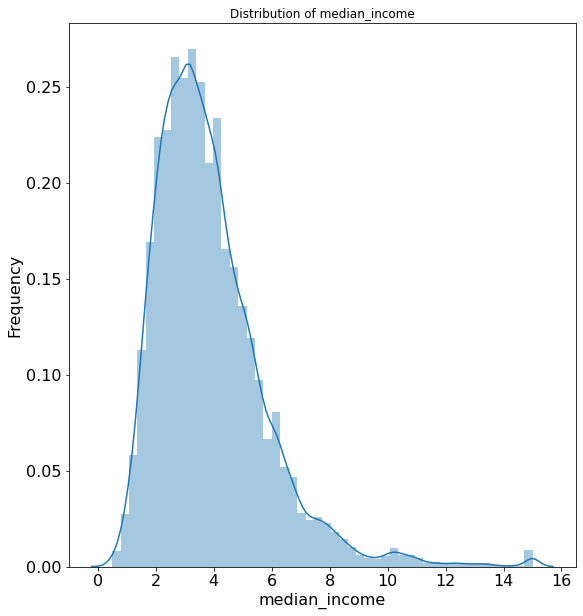

In [123]:
fig =plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(dfhouse['median_income'])
plt.ylabel('Frequency')
plt.title('Distribution of median_income')

In [124]:
dfhouse["income_cat"] = pd.cut(dfhouse["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [125]:
dfhouse["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

## Intepretation

It is important to have a sufficient number of instances in your dataset for each stratum, else the estimate of a stratums importance may be biased. This means that that you should not have too many starta, end each stratum should be large enough. 

Stratum
- In statistics, a stratum (plural strata) refers to a subset (part) of the population (entire collection of items under consideration) which is being sampled. Stratification thus consists of dividing the population into strata within each of which an independent sample can be chosen

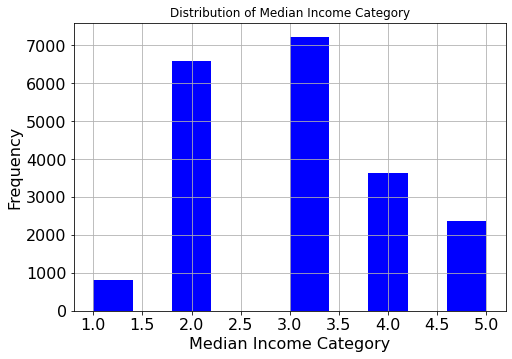

In [126]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Median Income Category',ylabel = 'Frequency',title = 'Distribution of Median Income Category')
dfhouse["income_cat"].hist(color = 'blue',ax=ax)
plt.show()

## Income Category (labeled from 1 to 5)

- Category 1 ranges from 0 to 1.5 ( this means the Median Income is less  +- 15 000 USD)
- Category 2 range 1.5 to 3 ( this means the Median Income greater  +- 15 000 USD and less than 30 000 USD)

# Creating Train and Test split on dataset
## DIFFERENCE BETWEEN USING 
## - StratifiedShuffleSplit and train_test_split


Analysis of these to different methods for splitting data for test and training follow!

In [127]:
from sklearn.model_selection import StratifiedShuffleSplit

Stratified Sampling: This is a sampling technique that is best used when a statistical population can easily be broken down into distinctive sub-groups. Then samples are taken from each sub-groups based on the ratio of the sub groups size to the total population. Using the dogs example again, imagine now we have four distinctive breed of dogs in the 1000 population broken down into A:450, B:250, C:200 and D:100. To perform the sampling of the 200 dogs needed, 45% of the sample must come from A, 25% from B, 20% from C and lastly 10% must come from D. Using Stratified Sampling technique ensures that there will be selection from each sub-groups and prevents the chance of omitting one sub-group leading to sampling bias.

In [128]:
from sklearn.model_selection import train_test_split

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 

train_test_split has several parameters. 

X, y. The first parameter is the dataset you're selecting to use.

train_size. This parameter sets the size of the training dataset. 

There are three options: None, which is the default
Int, which requires the exact number of samples, and 
float, which ranges from 0.1 to 1.0.

test_size. This parameter specifies the size of the testing dataset. 

The default state suits the training size. It will be set to 0.25 if the training size is set to default.

random_state. The default mode performs a random split using np.random.

In [129]:
# splitting using train_test_split 

train_set, test_set = train_test_split(dfhouse, test_size = 0.3, random_state = 42)

In [130]:
train_set.shape, test_set.shape

((14448, 11), (6192, 11))

In [131]:
test_set['income_cat'].value_counts()/len(test_set)

3    0.353036
2    0.321867
4    0.170543
5    0.113695
1    0.040859
Name: income_cat, dtype: float64

In [132]:
train_set['income_cat'].value_counts()/len(train_set)

3    0.349529
2    0.317553
4    0.178779
5    0.114756
1    0.039383
Name: income_cat, dtype: float64

In [133]:
sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
sss.get_n_splits(dfhouse)

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)
for train_index, test_index in sss.split(dfhouse, dfhouse["income_cat"]):
    print('Train:', train_index, 'Test:', test_index)
    str_train_set1 = dfhouse.loc[train_index]
    str_test_set1 = dfhouse.loc[test_index]

Train: [ 8577  5960  4753 ... 15591  5676  7730] Test: [17966 17037  7313 ...  8136 15200 13586]
Train: [ 4217 19699 15773 ... 13940 14973 13115] Test: [ 6668 20614  2486 ...  9659 18927  1357]
Train: [ 4674 20416  9935 ... 16251  5112 12316] Test: [3550 3800 8817 ... 6471 4531 6217]
Train: [11372 13216 11939 ... 13957  8406 10396] Test: [ 3306  4791 19619 ... 14462 11622  1208]
Train: [ 8640  6282 15966 ...  4680 13116 19654] Test: [ 7270  5790  6884 ...  4858 10040   615]


In [134]:
str_test_set1['income_cat'].value_counts()/len(str_test_set1)

3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: income_cat, dtype: float64

In [135]:
str_train_set1['income_cat'].value_counts()/len(str_train_set1)

3    0.350568
2    0.318868
4    0.176287
5    0.114480
1    0.039798
Name: income_cat, dtype: float64

We can evaluate both approaches via the snippet below, as you can test sets generated using the stratified approach (stratified sample) are similar to the overall dataset (population), whereas the test set generated using purely random sampling is quite skewed.

In [136]:
def income_cat_strsplit(dfhouse):
    return dfhouse['income_cat'].value_counts() / len(dfhouse)

train_set, test_set = train_test_split(dfhouse, test_size = 0.2, random_state = 42)
compare_splits = pd.DataFrame({
    "Overall": income_cat_strsplit(dfhouse),
    "Random": income_cat_strsplit(test_set),
    "Stratified": income_cat_strsplit(str_test_set1)
})

compare_splits['Rand. %error'] = 100 * compare_splits['Random'] / compare_splits ['Overall'] -100


compare_splits['Strat. %error'] = 100 * compare_splits['Stratified'] / compare_splits ['Overall'] -100

compare_splits
compare_splits.sort_index()

Overall    Random  Stratified  Rand. %error  Strat. %error
1  0.039826  0.040213    0.039890      0.973236       0.162206
2  0.318847  0.324370    0.318798      1.732260      -0.015195
3  0.350581  0.358527    0.350614      2.266446       0.009213
4  0.176308  0.167393    0.176357     -5.056334       0.027480
5  0.114438  0.109496    0.114341     -4.318374      -0.084674

## Interpreration
By evaluate Random split and Stratified split approaches it is clear from the table above that the test sets generated using the stratified approach (stratified sample) are similar to the overall dataset (population), whereas the test set generated using purely random sampling is quite skewed. This is this Stratified approach for splitting the data set is preferred over the Random split. 

# Exploratory Data Analysis (EDA)

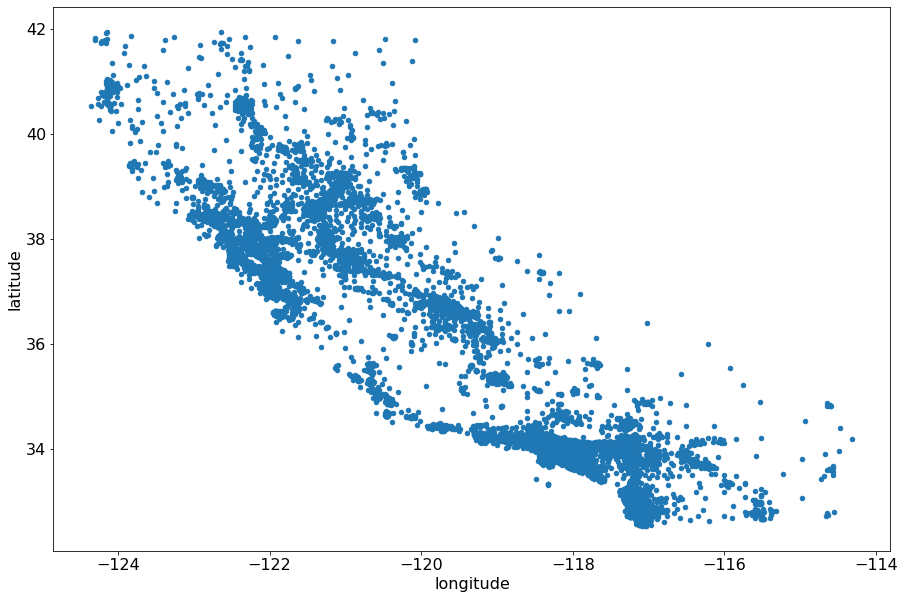

In [137]:
dfhouse.plot(kind = 'scatter', x = 'longitude', y = 'latitude', figsize = (15,10))

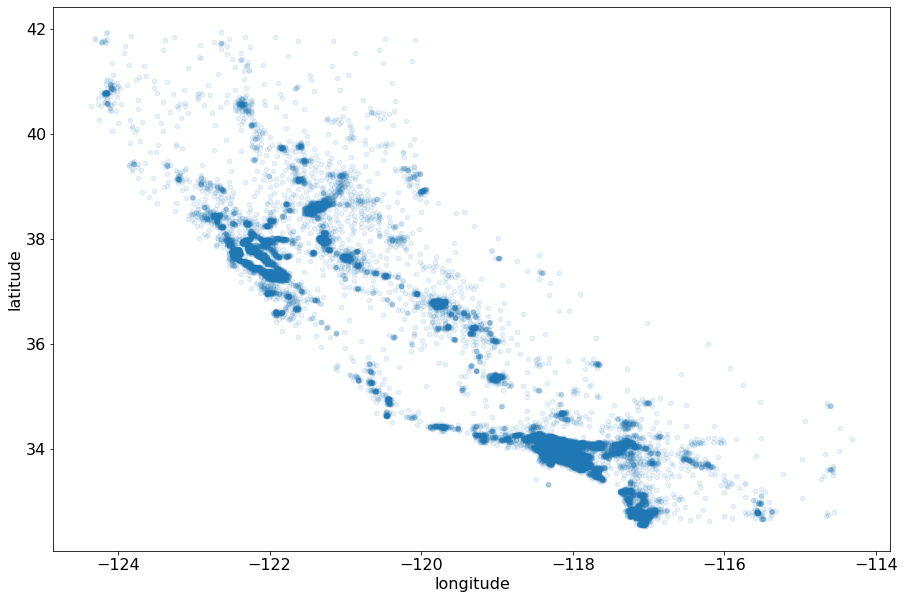

In [138]:
dfhouse.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1, figsize = (15,10))

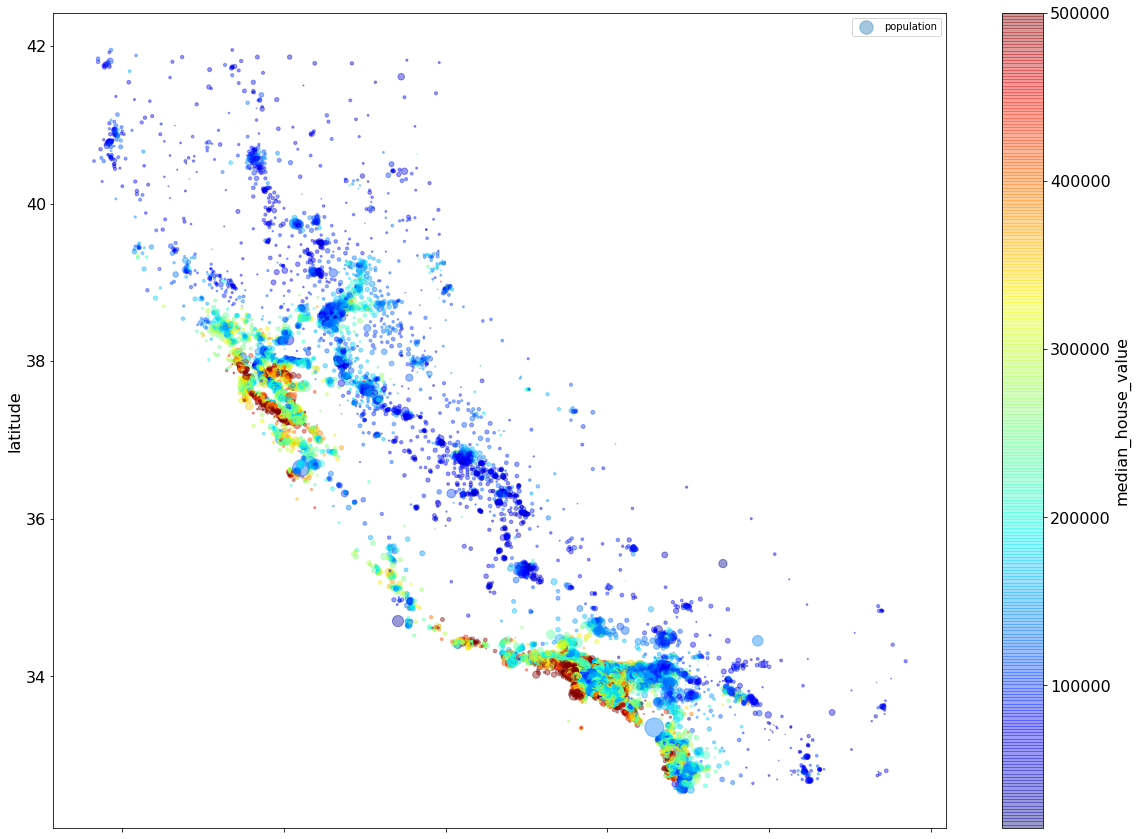

In [139]:
dfhouse.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, figsize = (20,15), s = dfhouse['population']/100, label = "population", c = 'median_house_value', cmap = plt.get_cmap("jet"), colorbar = True)

plt.legend()

Its is quite clear that the housing prices are quite clustered to specific location and the population density. 

This is a perfect task for a clustering algorithm to identify the main clusters. Also looking at the image generated below, this clustering is also due to the property proximity to the coast. Earlier we saw that the attribute 'oceab proximity' can be quite useful. 

In [140]:
dfhouse['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

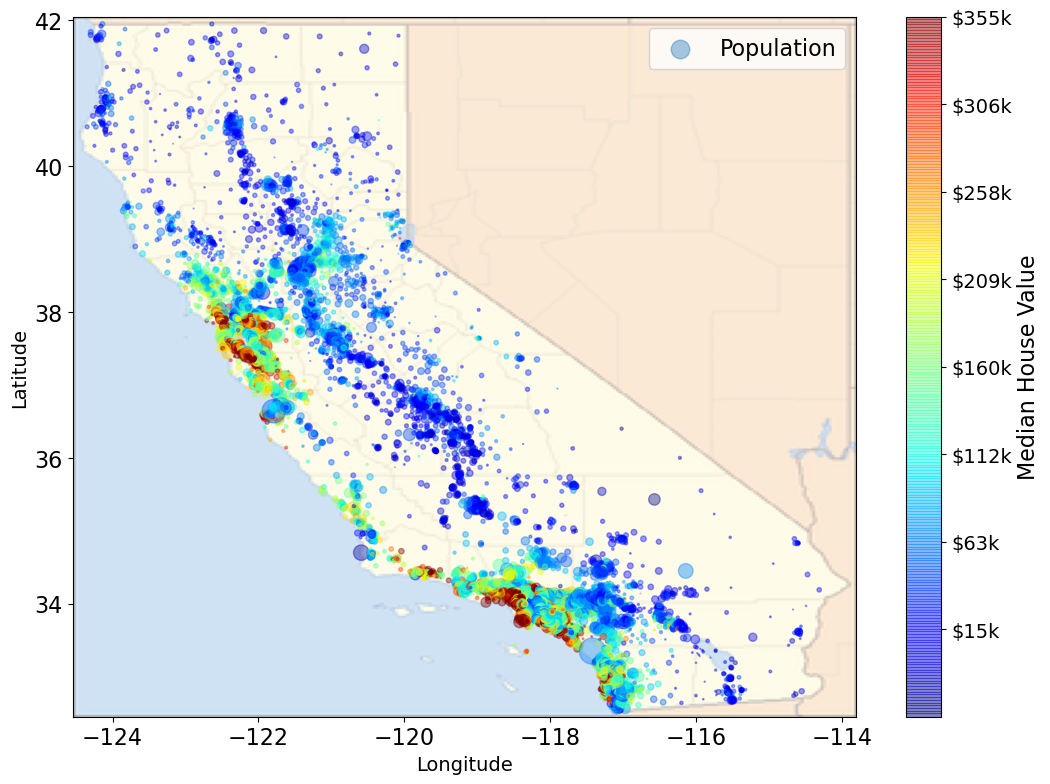

In [141]:
fig = plt.figure(dpi = 100,figsize = (4,4))
ax = fig.add_axes([1,1,1,1])

import matplotlib.image as mpimg
california_img=mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG")
dfhouse.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),ax=ax,
                       s=dfhouse['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = dfhouse["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show();

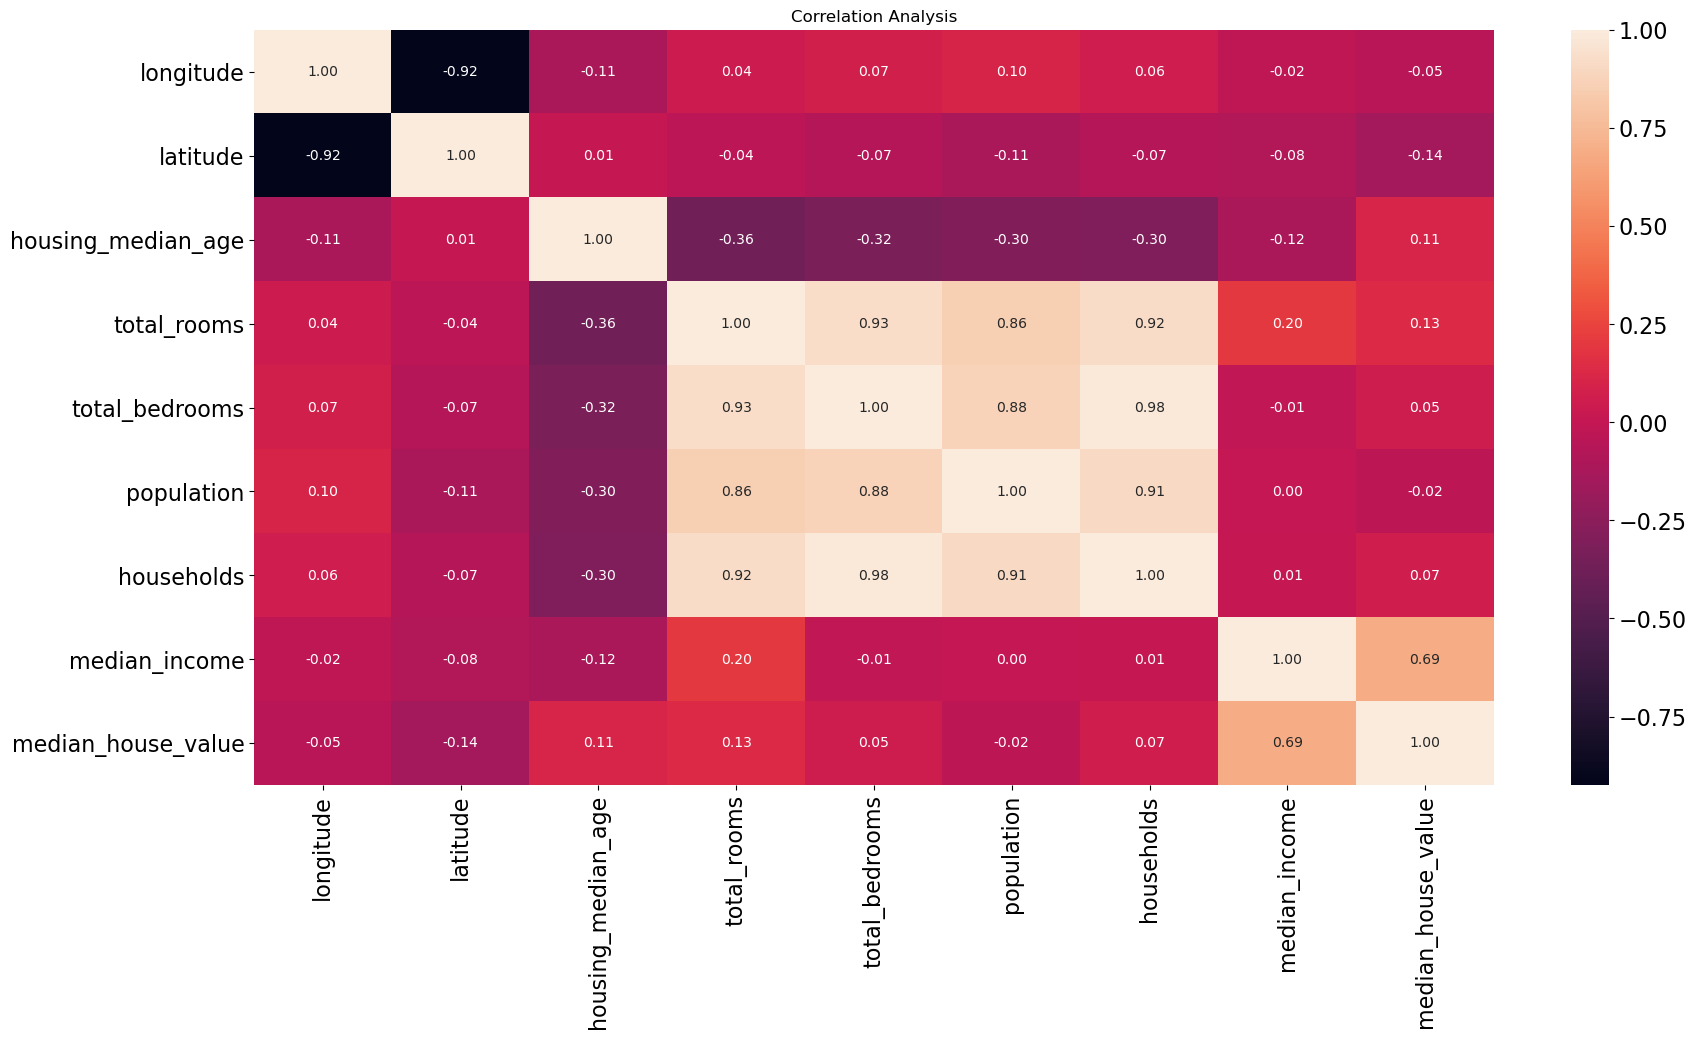

In [142]:
corr2 = dfhouse.corr()
#mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100, figsize = (20,10))
plt.title('Correlation Analysis')
sns.heatmap(corr2,annot=True,lw=0,linecolor='red',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [143]:
corr3 = dfhouse.corr()

In [144]:
corr3['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [145]:
from pandas.plotting import scatter_matrix

In [146]:
corr3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef7511e640>,
      dtype=object)

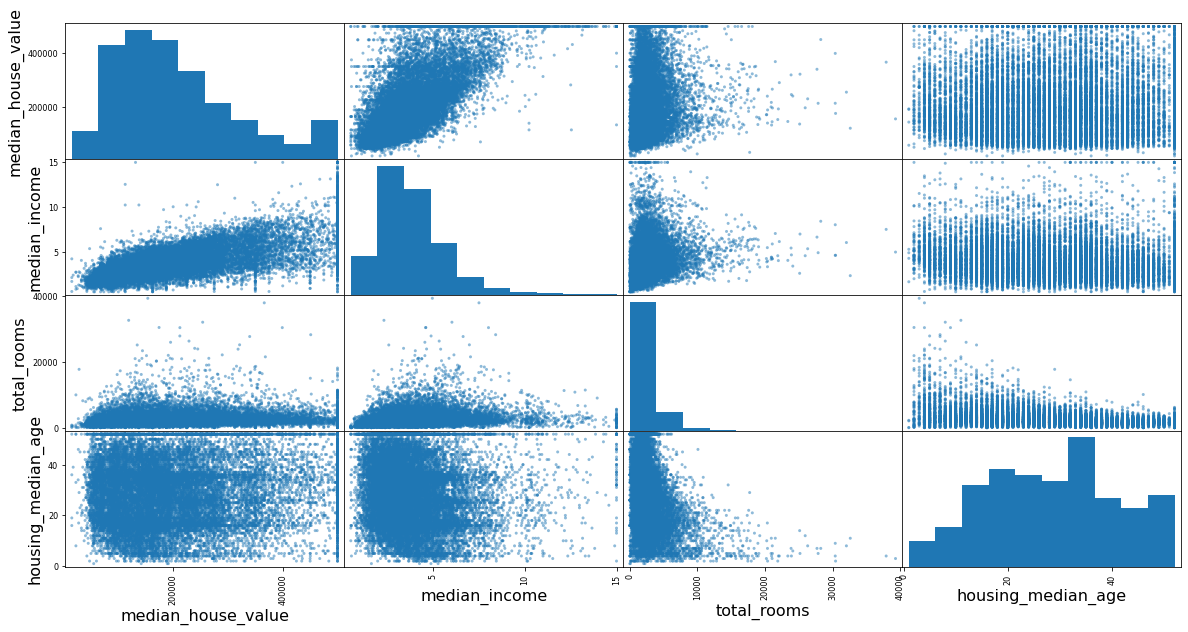

In [147]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(dfhouse[attributes], figsize=(20,10))

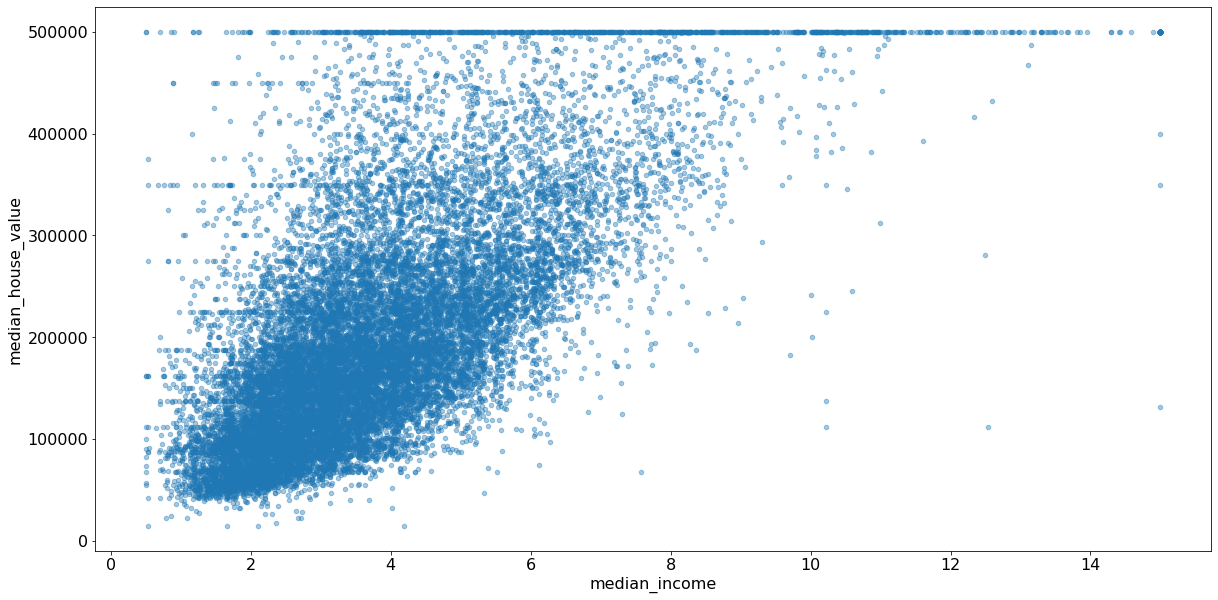

In [148]:
dfhouse.plot(kind = "scatter", x = 'median_income', y = "median_house_value", alpha = 0.4, figsize=(20,10))

# Interpretation

Correlation between 'median_income' and "median_house_value" is quite strong with the obvious increasing trend. Something that we noticed earlier with respect to a price cap is clear from this plot at 500 000 USD. 

A few lines are also possible from the data 450k, 350k, 290k 280k, 250k USD and at other values below as well. This will surely influence the performance of the algorithm. 

# Attribute Combinations

The total number of rooms in a district is not very useful if you dont know how many households there are. What would be useful is the number of rooms per household.

Same as total number of bedrooms by itself is not very useful, you probably want to compare it to the number of rooms. The population per household also seems useful attribute. 

In [149]:
dfhouse["rooms_per_household"] = dfhouse["total_rooms"]/dfhouse["households"]
dfhouse["bedrooms_per_room"] = dfhouse["total_bedrooms"]/dfhouse["total_rooms"]
dfhouse["population_per_household"]=dfhouse["population"]/dfhouse["households"]

In [150]:
corr4 = dfhouse.corr()
corr4['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [151]:
corr3['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

It seems that the feature combination improved the correlation of some features, the dfhouse['bedrooms_per_room' is] stronger correlated to dfhouse['median house values']

Properties with a lower bedroom/room ration end up being more expensive.

The larger the house the more expensive but this is what is expected generally and more specifically for this region. 

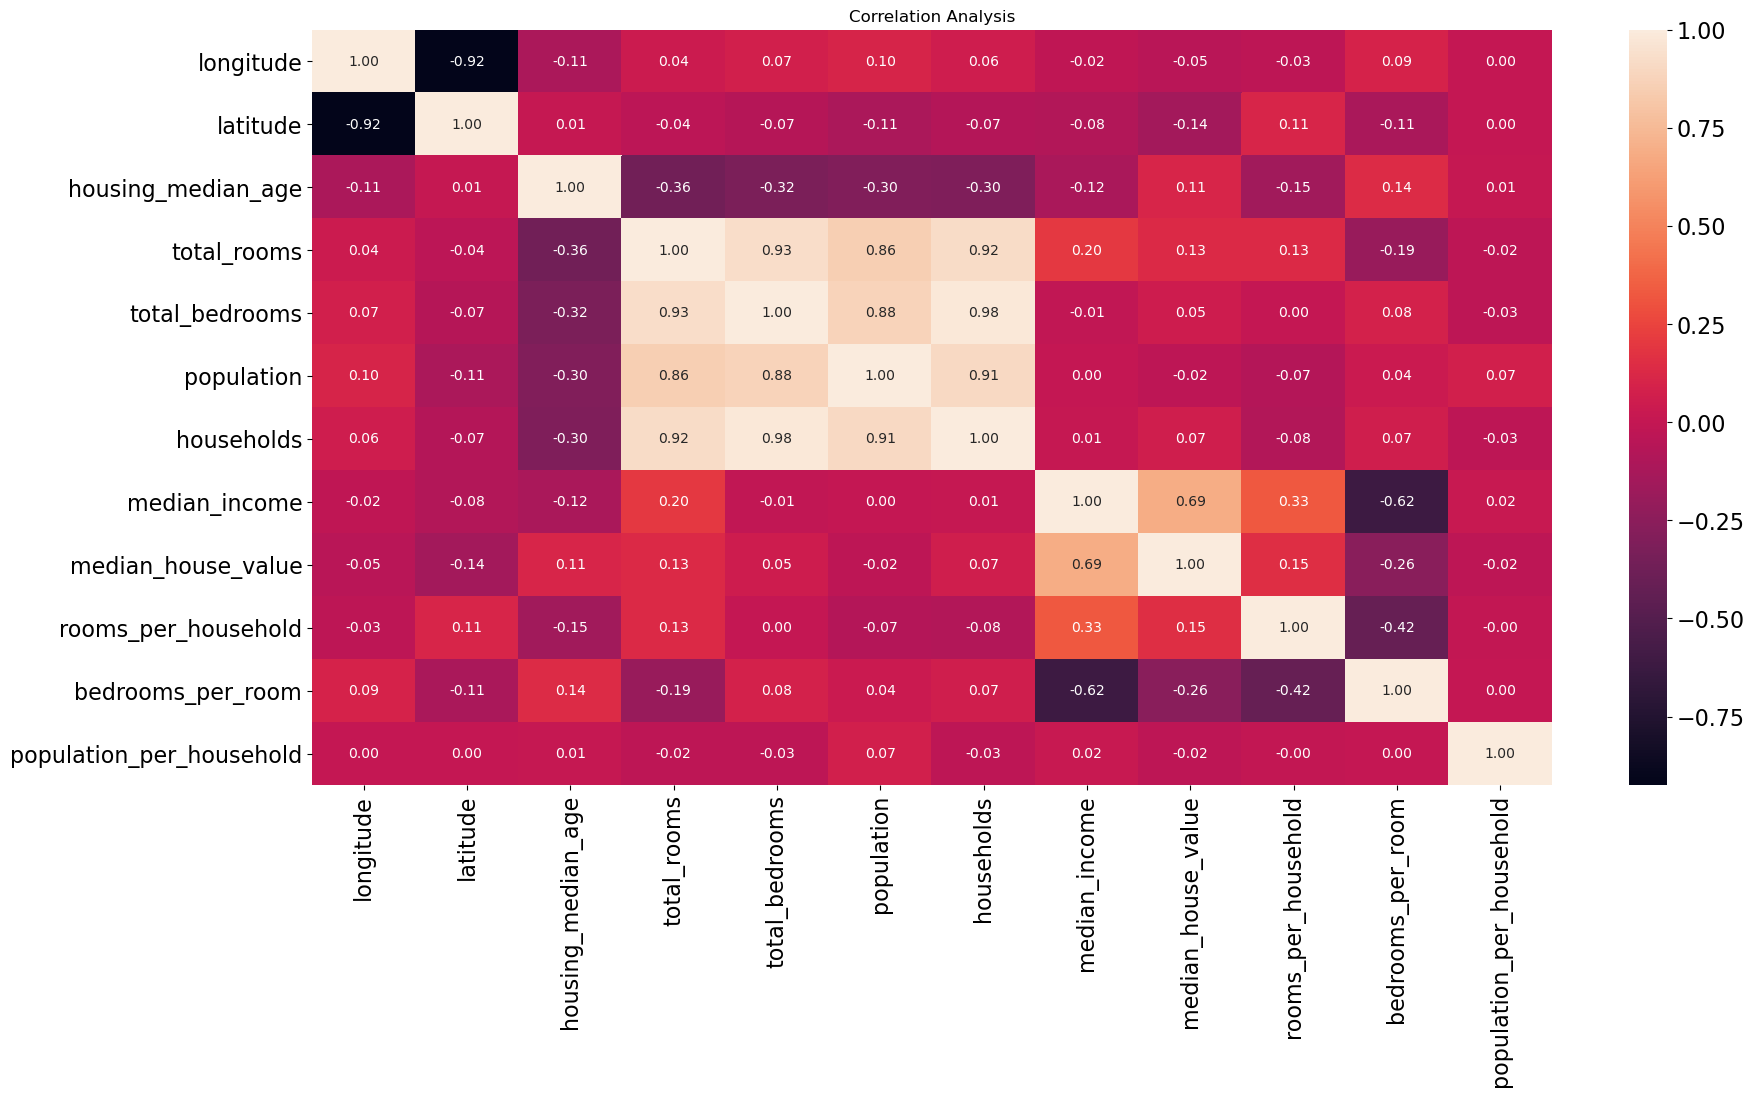

In [152]:

plt.figure(dpi=100, figsize = (20,10))
plt.title('Correlation Analysis')
sns.heatmap(corr4,annot=True,lw=0,linecolor='red',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [153]:
dfhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

# Data preparation for Machine Learning 

In [154]:
dfhouse = str_train_set1.drop("median_house_value", axis=1) # drop labels for training set
dfhouse_labels = str_train_set1["median_house_value"].copy()

In [155]:
dfhouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 8640 to 19654
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           14448 non-null  float64 
 1   latitude            14448 non-null  float64 
 2   housing_median_age  14448 non-null  float64 
 3   total_rooms         14448 non-null  float64 
 4   total_bedrooms      14296 non-null  float64 
 5   population          14448 non-null  float64 
 6   households          14448 non-null  float64 
 7   median_income       14448 non-null  float64 
 8   ocean_proximity     14448 non-null  object  
 9   income_cat          14448 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.1+ MB


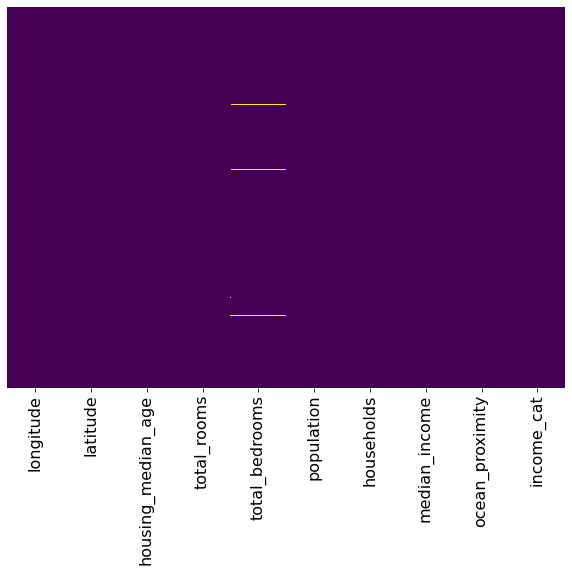

In [156]:
plt.figure(figsize = (10, 7)) # Make the figure larger

#checking for any missing data from dataframe
sns.heatmap(dfhouse.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [157]:
from sklearn.impute import SimpleImputer

Initailly ones needs to create a SimpleImputer instance, specifying that you want to replace each attribute missing values with the median of that attribute. 

Now since median can only be computed to numerical attributes, one need to create a copy of the data without the text containing attribute dfhouse['ocean_proximity']

In [158]:
imputer = SimpleImputer(strategy='median')

dfhouse_num = dfhouse.drop("ocean_proximity", axis=1)

fit imputer to the training data using .fit() method

In [159]:
imputer.fit(dfhouse_num)

SimpleImputer(strategy='median')

imputer computed the median for eath attribute and stored it in the .statistics_  instance variable 

In [160]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2122.    ,  435.    , 1164.    ,
        408.    ,    3.5417,    3.    ])

In [161]:
dfhouse_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2122.    ,  435.    , 1164.    ,
        408.    ,    3.5417,    3.    ])

This trained imputer to transform the training set by placing missing values with the learned medians

In [162]:
X = imputer.transform(dfhouse_num)

The results is a plain Numpy array that contains the transformed features, the code blow puts into a pd.DataFrame which can also be visuallized!

In [163]:
dfhouse_tr = pd.DataFrame(X, columns = dfhouse_num.columns, index = dfhouse_num.index)
dfhouse_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8640     -118.40     33.87                26.0       6712.0          1441.0   
6282     -117.92     34.03                35.0       1469.0           306.0   
15966    -122.45     37.71                34.0       3131.0           669.0   
4829     -118.30     34.04                24.0       2092.0           585.0   
10554    -117.71     33.63                16.0       1565.0           274.0   

       population  households  median_income  income_cat  
8640       2803.0      1394.0         5.2276         4.0  
6282       1285.0       308.0         3.9219         3.0  
15966      2204.0       600.0         3.5536         3.0  
4829       1757.0       538.0         1.7109         2.0  
10554       950.0       280.0         5.8399         4.0

# Handling Text and Categorical Attributes

Here we are mainly talking about the  --- dfhouse[['ocean_proximity']] --- column, this text handling will make it easier to the Machine Learning algorithm to deal with the data. 

In [164]:
dfhouse_cat = dfhouse[['ocean_proximity']]
dfhouse_cat.head(10)

ocean_proximity
8640        <1H OCEAN
6282        <1H OCEAN
15966      NEAR OCEAN
4829        <1H OCEAN
10554       <1H OCEAN
10000          INLAND
7410        <1H OCEAN
5666       NEAR OCEAN
4384        <1H OCEAN
5761        <1H OCEAN

The 'ocean_proximity', there is a small amount of possible values, each of which represents a category making this a categorical attribute. The aim here is use Scikit-Learn OrdinalEncoder

In [165]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dfhouse_cat_encoder = ordinal_encoder.fit_transform(dfhouse_cat)
dfhouse_cat_encoder[:10]
#dfhouse_cat_encoder

array([[0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [1.],
       [0.],
       [4.],
       [0.],
       [0.]])

Tranformed into a 1D array

In [166]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [167]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse = True)
dfhouse_cat_1hot = cat_encoder.fit_transform(dfhouse_cat)
dfhouse_cat_1hot

<14448x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14448 stored elements in Compressed Sparse Row format>

The preprocessing tool from scikit-learn is called one-hot encoding, because only one attribute will be equal to 1 (hot) while the other will be 0 (cold) - This is generally refered to as dummy attributes. OneHotEncoder class to convert categorical values into one-hot vectors.

Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns a dense matrix. When there is such a mix of sparse and dense matrics, the ColumnTransformer estimates the density of the final matrix (i.e. the ratio of nonzero cells)  and returns a sparse matrix if the density is lower than a given threshold. In the example below it will return a dense matrix

In [187]:
dfhouse_cat_1hot

<14448x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14448 stored elements in Compressed Sparse Row format>

It is clear that the array is no longer a 1D Numpy array but a SciPy sparse matrix. This is quite a useful conversion and manipulation when one has 1000's of attributes of categories. 

Note: After one-hot encoding, we get a matrix with 1000 of columns, and the matrix is full of 0s and 1s except for singel 1 per row. Uisng up tons of memory to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzeros element. YOu can use it mostly like a normal 2D array but if you want to convert it to a (dense) Numpy array, just call the toarry() method. 

In [184]:
dfhouse_cat

ocean_proximity
8640        <1H OCEAN
6282        <1H OCEAN
15966      NEAR OCEAN
4829        <1H OCEAN
10554       <1H OCEAN
...               ...
13226          INLAND
15100       <1H OCEAN
4680        <1H OCEAN
13116          INLAND
19654          INLAND

[14448 rows x 1 columns]

In [169]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Customer Transformer 

In [170]:
dfhouse.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

Custom cleanup operations or combinating specific attribute. 

Inheriting from TransformerMixin ensures that all we need to do is write our fit and transform methods and we get fit_transform for free. Inheriting from BaseEstimator ensures we get get_params and set_params for free. Since the fit method doesn’t need to do anything but return the object itself, all we really need to do after inheriting from these classes, is define the transform method for our custom transformer and we get a fully functional custom transformer that can be seamlessly integrated with a scikit-learn pipeline!

In [171]:
#https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65

#Custom Transformer that extracts columns passed as argument to its constructor 

from sklearn.base import BaseEstimator, TransformerMixin
"""A tranformer for combining low count observations for categorical features.

    This transformer will preserve category values that are above a certain
    threshold, while bucketing together all the other values. This will fix issues
    where new data may have an unobserved category value that the training data
    did not have.
    """

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        """"Initialize method.
        Args:
            threshold (float): The threshold to apply the bucketing when
                categorical values drop below that threshold.
        """
        
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    """Fits transformer over X.

        Builds a dictionary of lists where the lists are category values of the
        column key for preserving, since they meet the threshold.
        """
    #Method that describes what we need this transformer to do
    def transform(self, X):
        """Transforms X with new buckets.

        Args:
            X (obj): The dataset to pass to the transformer.

        Returns:
            The transformed X with grouped buckets.
        """
        
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_atrribs = attr_adder.transform(dfhouse.values)

In the above example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default. This hyperparameter will alow you to easily find out whether adding this attribute helps the ML algorithm or not. Generallym you can add hyperparameters to gate any data preparation step, the more combinations you can automatically try out, making it much more likely that you will find the great combination. SAVES A LOT OF TIME!

In [172]:
housing_extra_atrribs

array([[-118.4, 33.87, 26.0, ..., 4, 4.814921090387374,
        2.0107604017216643],
       [-117.92, 34.03, 35.0, ..., 3, 4.76948051948052,
        4.172077922077922],
       [-122.45, 37.71, 34.0, ..., 3, 5.218333333333334,
        3.6733333333333333],
       ...,
       [-118.34, 34.07, 52.0, ..., 3, 6.065602836879433,
        2.132978723404255],
       [-121.2, 38.36, 14.0, ..., 3, 6.097222222222222,
        3.2453703703703702],
       [-120.86, 37.49, 37.0, ..., 2, 4.593220338983051,
        3.7838983050847457]], dtype=object)

In [173]:
type(attr_adder)

__main__.CombinedAttributesAdder

# Feature Scalling 

ML algorithms do not perform well when input numerical attributes have different scales. This is the case for the houseing data : Total number of rooms range from 6 - 39320, while the median income only range from 0 - 15. Note that the scaling the target values is generallly not required. 

There  are two common ways to get all attributes to have the same scale, min-max scalling and standarization. 

## Min-max scalling (aka normalization) is the simplest, 
values are shifted and rescaled so that they end up ranging from 0 to 1. This can be done using Scikit-Learn using transformer called MinMaxScaler. It works in the following way by subtracting the min value and dividing by the max munis the min. It has a feature_range hyperparameter that lets you change the range if, for some reason you dont want 0 - 1. 

## Standardization is different: 
First it subtracts the mean value (so standardized values always have zero mean) and then it divides by standard deviation so that the resulting distribution has the unit variance. 

Unlike max-min scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms ( e.g., neural networks often expect an input value range from 0 - 1).

However standardization is much less afftered by outliers. For example, suppose a district had a median income is 100(by mistake). Min-max scaling would then crush all the other values from 0 - 15 down to 0 - 0.15, where as standardization would not be much affected. Scikit-Learn using transformer called StandardScaler for standardization. 


# NB!

It is important to fit the scalers to training data only, not to full dataset(including the test set. Only then can you use them to tranform the training set and the test set(new data)


# Transformer Pipelines

The sequence of many data transformation steps are sequence dependent as you can notice from the approaches taken above. Scikit-Learn provides Pipeline class to help with such sequences of transformation. The bottome Pipeline can be utilized for numerical attributes


In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_prepared_tr = num_pipeline.fit_transform(dfhouse_num)

Pipeline construction takes a list of name/estimators pairs defining a sequence of steps. The last estimator must be transformers( i.e. they must have a fit_transform() method). The names can be anything you like (as long as they are unique and dont contain double underscore, __   This is important for hyperparameter tuning.

One can call the pipelines fit() method, it calls fit_tranform() sequentailly on all transformers, passing the output of each call as the parameters to the next call until it reaches the final estimator for which it calls the fit() method. 


The pipeline exposes the same methods as the final estimator, In this example the last estimator is a StandardScaler, which is a tranformer so the pipeline has a transform() method that applies all the tranformers to the data in sequence. 

Up until now we have handled the caterogrical columns and numerical columns separetely. It would bemore convinient to hav ea single tranformer able to handle all columsn, applying the appropriate tranformations to each column. See example below


In [175]:
from sklearn.compose import ColumnTransformer # import the ColumnTransformer class  

num_attribs = list(dfhouse_num) 
# get a list of catergorical columns names to construct a colum tranformer
cat_attribs = ["ocean_proximity"]

# the constructor requires a list of tranformers 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(dfhouse)

The constructor requiers a list of tuples, where each tuple contains a name, a transformer, and list of names (or indices) of columns that the transformer shoudl be applied to. In this above example we specify numerical columns should be tranformed using num_pipeline tthat we defined, and the catergorical columns should be tranformed using a OneHotEncoder. ColumnTransformer to the housing data, each transformer to the approproiate columns concatentes the output along the second axis (tranformers must return the same number of rows) 

In [176]:
housing_prepared

array([[ 0.58457626, -0.82500684, -0.21245389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82426077, -0.75022414,  0.50506218, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43776179,  0.96977798,  0.42533818, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.61453682, -0.73152846,  1.86037032, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81358338,  1.2735827 , -1.16914198, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64380685,  0.86695177,  0.6645102 , ...,  0.        ,
         0.        ,  0.        ]])

In [177]:
num_attribs[-2]

'median_income'

In [178]:
type(num_attribs[-2])

str

# FUN PART :) 

# Training and Evaluation of the Training Set 

In [179]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, dfhouse_labels)

LinearRegression()

In [188]:
some_data = dfhouse.iloc[:5]
some_data
some_labels = dfhouse_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', lin_reg.predict(some_data_prepared))

Predictions:  [349753.35516771 199839.81687043 221687.84851066 132445.02165718
 267994.07556646]


In [189]:
print('Labels: ', list(some_labels))

Labels:  [434500.0, 159500.0, 251000.0, 175000.0, 220600.0]


In [191]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, 

housing_predictions = lin_reg.predict(housing_prepared)
lin_reg_mse = mean_squared_error(dfhouse_labels, housing_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
print("RMSE ==> ", lin_reg_rmse)
print("R^2 Model score ==> ",lin_reg.score(housing_prepared, dfhouse_labels))

RMSE ==>  67873.22811242197
R^2 Model score ==>  0.65441549651295


This prediction is not great it has an error of around 35 %, most districs median_housing_values range between 120 000 and 265 000 USD so a typical so a typical RMSE error of 67873 USD  does not really make for a great model.

When something like this occurs it means the features do not provide enough information to make a good enough prediction or that the model is not powerful enough. A clear case of underfitting. 

Main ways to fix underfitting ar to select a more powerful model, to feed the training algorithm with better features or to reduce the constraints on the model. The model is not regularized, which rules our the last option. 

In [192]:
dfhouse_labels

8640     434500.0
6282     159500.0
15966    251000.0
4829     175000.0
10554    220600.0
           ...   
13226    123500.0
15100    144900.0
4680     500001.0
13116    175700.0
19654     69500.0
Name: median_house_value, Length: 14448, dtype: float64

In [193]:
housing_prepared

array([[ 0.58457626, -0.82500684, -0.21245389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82426077, -0.75022414,  0.50506218, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43776179,  0.96977798,  0.42533818, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.61453682, -0.73152846,  1.86037032, ...,  0.        ,
         0.        ,  0.        ],
       [-0.81358338,  1.2735827 , -1.16914198, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64380685,  0.86695177,  0.6645102 , ...,  0.        ,
         0.        ,  0.        ]])

In [194]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(housing_prepared, dfhouse_labels)

housing_predictions = dec_tree.predict(housing_prepared)
dec_tree_mse = mean_squared_error(dfhouse_labels, housing_predictions)
dec_tree_rmse = np.sqrt(dec_tree_mse)
print("RMSE ==> ", dec_tree_rmse)
print("R^2 Model score ==> ",dec_tree.score(housing_prepared, dfhouse_labels))

RMSE ==>  0.0
R^2 Model score ==>  1.0


# WARNING!!!!!  THIS IS TO GOOD TO BE TRUE!!! LOOK CLOSER AT THIS!!

## Better evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the train_test_split() function to split the training set into a smaller training set and a validation set, then train  your models against the smaller training set and evaluate them again the validation set. Its a bit of work, but nothing too difficult and it would work faily well.

Scikit-Learn K-fold cross validation feature. 

The code below randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times pickind a different fold for evaluation every time and training on the other 9 folds. The results is an array containing the 10 evaulations scores:

In [228]:
from sklearn.model_selection import cross_val_score

dec_tree_scores10 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=10)
dec_tree_rmse_scores10 = np.sqrt(-dec_tree_scores10)

In [229]:
def display_scores10(dec_tree_scores10):
    print("Scores:", dec_tree_scores10)
    print("Mean:", dec_tree_scores10.mean())
    print("Standard deviation:", dec_tree_scores10.std())
display_scores(dec_tree_rmse_scores10)

Scores: [69361.46143871 70168.34327305 70748.06721049 68043.20091304
 68591.81505572 71306.15223831 70332.24562546 76517.97951902
 72614.25629365 71486.45480079]
Mean: 70916.997636824
Standard deviation: 2274.7140045986184


In [230]:
dec_tree_scores9 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=9)
dec_tree_rmse_scores9 = np.sqrt(-dec_tree_scores9)

In [231]:
def display_scores9(dec_tree_scores9):
    print("Scores:", dec_tree_scores9)
    print("Mean:", dec_tree_scores9.mean())
    print("Standard deviation:", dec_tree_scores9.std())
display_scores(dec_tree_rmse_scores9)

Scores: [69664.06758503 73035.83182711 70986.08997128 71572.78451015
 69195.5206619  73894.09350464 73470.16979713 69919.85585594
 72297.14079592]
Mean: 71559.50605656621
Standard deviation: 1633.7797458595694


In [232]:
dec_tree_scores8 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=8)
dec_tree_rmse_scores8 = np.sqrt(-dec_tree_scores8)

In [233]:
def display_scores8(dec_tree_scores8):
    print("Scores:", dec_tree_scores8)
    print("Mean:", dec_tree_scores8.mean())
    print("Standard deviation:", dec_tree_scores8.std())
display_scores(dec_tree_rmse_scores8)

Scores: [70155.05849617 72857.32948607 71711.86252687 67454.91430862
 72893.09950556 70269.83312599 73423.23542571 70013.51583035]
Mean: 71097.3560881691
Standard deviation: 1874.9781487109537


In [234]:
dec_tree_scores7 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=7)
dec_tree_rmse_scores7 = np.sqrt(-dec_tree_scores7)

In [235]:
def display_scores7(dec_tree_scores7):
    print("Scores:", dec_tree_scores7)
    print("Mean:", dec_tree_scores7.mean())
    print("Standard deviation:", dec_tree_scores7.std())
display_scores(dec_tree_rmse_scores7)

Scores: [73291.99071091 72398.1107385  70946.70389284 72157.0405734
 69524.24868265 76185.30522432 71063.52277111]
Mean: 72223.84608481803
Standard deviation: 1968.8354464613994


In [236]:
dec_tree_scores6 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=6)
dec_tree_rmse_scores6 = np.sqrt(-dec_tree_scores6)

In [237]:
def display_scores6(dec_tree_scores6):
    print("Scores:", dec_tree_scores6)
    print("Mean:", dec_tree_scores6.mean())
    print("Standard deviation:", dec_tree_scores6.std())
display_scores(dec_tree_rmse_scores6)

Scores: [70421.7035109  69925.5563898  69115.39810785 72292.84721714
 76147.08087345 69453.76121658]
Mean: 71226.0578859549
Standard deviation: 2425.170681483174


In [238]:
dec_tree_scores5 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=5)
dec_tree_rmse_scores5 = np.sqrt(-dec_tree_scores5)

In [239]:
def display_scores5(dec_tree_scores5):
    print("Scores:", dec_tree_scores5)
    print("Mean:", dec_tree_scores5.mean())
    print("Standard deviation:", dec_tree_scores5.std())
display_scores(dec_tree_rmse_scores5)

Scores: [70131.15569763 72438.39685414 70931.79839616 73286.82374687
 70375.83019897]
Mean: 71432.80097875625
Standard deviation: 1225.650418697071


In [240]:
dec_tree_scores4 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=4)
dec_tree_rmse_scores4 = np.sqrt(-dec_tree_scores4)

In [241]:
def display_scores4(dec_tree_scores4):
    print("Scores:", dec_tree_scores4)
    print("Mean:", dec_tree_scores4.mean())
    print("Standard deviation:", dec_tree_scores4.std())
display_scores(dec_tree_rmse_scores4)

Scores: [71541.09420587 69950.73144246 72845.99976772 71438.86864991]
Mean: 71444.17351649015
Standard deviation: 1025.2935956068736


In [242]:
dec_tree_scores3 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=3)
dec_tree_rmse_scores3 = np.sqrt(-dec_tree_scores3)

In [243]:
def display_scores3(dec_tree_scores3):
    print("Scores:", dec_tree_scores3)
    print("Mean:", dec_tree_scores3.mean())
    print("Standard deviation:", dec_tree_scores3.std())
display_scores(dec_tree_rmse_scores3)

Scores: [72365.73939773 73120.33301661 72443.82234573]
Mean: 72643.29825335539
Standard deviation: 338.8174146519264


In [244]:
dec_tree_scores2 = cross_val_score(dec_tree, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=2)
dec_tree_rmse_scores2 = np.sqrt(-dec_tree_scores2)

In [245]:
def display_scores2(dec_tree_scores2):
    print("Scores:", dec_tree_scores2)
    print("Mean:", dec_tree_scores2.mean())
    print("Standard deviation:", dec_tree_scores2.std())
display_scores(dec_tree_rmse_scores2)

Scores: [74095.36114889 76322.50712755]
Mean: 75208.93413821593
Standard deviation: 1113.5729893294701


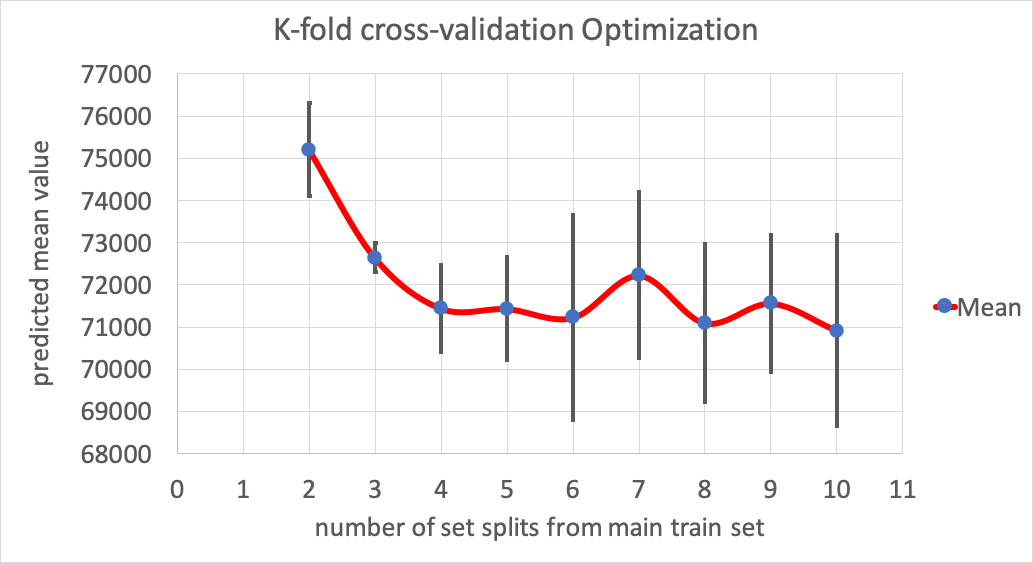

Mean: 71432.80097875625
Standard deviation: 1225.650418697071

RMSE ==>  67873.22811242197
R^2 Model score ==>  0.65441549651295

In [249]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=5, random_state=42)
forest_reg.fit(housing_prepared, dfhouse_labels)
forest_rmse

25672.809716410302

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(dfhouse_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE ==> ", forest_rmse)
print("R^2 Model score ==> ",forest_reg.score(housing_prepared, dfhouse_labels))

RMSE ==>  25672.809716410302
R^2 Model score ==>  0.950557086607074


In [251]:
def display_scores(forest_reg):
    print("Scores:", forest_reg)
    print("Mean:", forest_reg.mean())
    print("Standard deviation:", forest_reg.std())

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, dfhouse_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, dfhouse_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
final_model = grid_search.best_estimator_

X_test = str_test_set1.drop("median_house_value", axis=1)
y_test = str_test_set1["median_house_value"].copy()


X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
print("RMSE on Test ==> ",final_rmse)

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))